# DD Neutron propagation

Analysis of DD simulation of 10,000 neutrons where optics were turned off so only care about the neutron propagation, not what's seem here at the PMTs

In [1]:
import gdls_physics
import time
import glob
import matplotlib.pyplot as plt
import numpy as np
import tabulate

## Process verbose log

In [2]:
log_information = gdls_physics.baccarat_verbose_reader.extract_event_log_information('simulations/verbose_logs/dd_neutron_seed19_nbeamon10000_no_optics.log')

Found Run
### Run 0 start.

10000 Events in file


In [7]:
start_time = time.time()
n_events = len(log_information)
gdls_physics.progress_bars.progress_update(0, n_events, start_time)
for i, event in enumerate(log_information):
    event_dictionaries = gdls_physics.baccarat_verbose_reader.create_event_dicts(event, to_save=True, save_name='simulations/dd_neutron_10000_no_optics/event_' + str(i) + '.npy')
    gdls_physics.progress_bars.progress_update(i + 1, n_events, start_time)


Number to process = 10000 
Progress: [####################] 100.0% 
Average time 0.0s 
Time: 00:00:42 
Remaining time 00:00:00


In [10]:
del event_dictionaries
del log_information

## Propagation

### Load neutrons

In [2]:
file_names = glob.glob('simulations/dd_neutron_10000_no_optics/*.npy')
neutron_dictionaries = gdls_physics.baccarat_verbose_reader.extract_particle_from_dict(file_names, particle='neutron', merge_multiples=True)

Number to process = 10000 
Progress: [####################] 100.0% 
Average time 0.0s 
Time: 00:01:41 
Remaining time 00:00:00


### Neutrons End location

In [3]:
end_loc = [neutron['NextVolume'][-1] for neutron in neutron_dictionaries]

In [4]:
unique_volumes = np.unique(end_loc)
end_volume_weights = []
vols = []
for uni in unique_volumes:
    count = 0
    for j in end_loc:
        if j == uni:
            count += 1
    if count > 10:
        end_volume_weights.append(count)
        vols.append(uni)

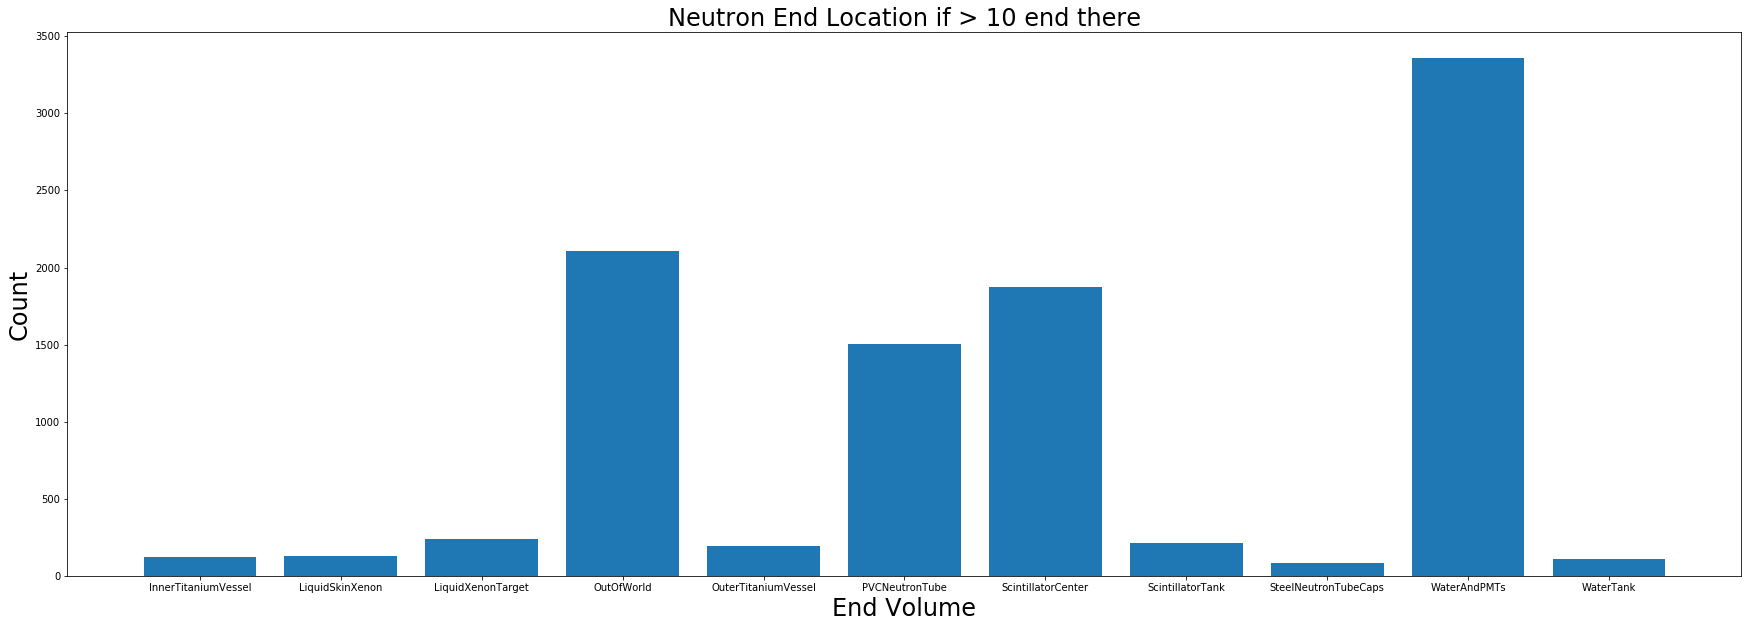

In [5]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('End Volume', size = 24 )
ax.set_title('Neutron End Location if > 10 end there', size = 24 ) 
ax.bar(vols, end_volume_weights)
plt.show()

In [6]:
unique_volumes = np.unique(end_loc)
non_ofw = [vols for vols in end_loc if vols != 'OutOfWorld']
end_volume_weights = []
vols = []
others = 0
for uni in unique_volumes:
    count = 0
    for j in end_loc:
        if j == uni:
            count += 1
    if count > 10:
        if uni != 'OutOfWorld':
            end_volume_weights.append([uni, count/len(end_loc) * 100, count/len(non_ofw) * 100])
        else:
            end_volume_weights.append([uni, count/len(end_loc) * 100, '-'])
    else:
        others += count
end_volume_weights.append(['other', others/len(end_loc) * 100, others/len(non_ofw) * 100])
end_volume_weights.sort(key = lambda i: i[1],reverse = True)

In [7]:
print(tabulate.tabulate(end_volume_weights, headers=['Detector Volume', 'Percentage (%)', 'Percentage (%)']))

Detector Volume         Percentage (%)  Percentage (%)
--------------------  ----------------  ------------------
WaterAndPMTs                     33.59  42.55130478844692
OutOfWorld                       21.06  -
ScintillatorCenter               18.75  23.752216873574866
PVCNeutronTube                   15.06  19.077780592855333
LiquidXenonTarget                 2.39  3.0276159108183434
ScintillatorTank                  2.16  2.7362553838358243
OuterTitaniumVessel               1.93  2.444894856853306
LiquidSkinXenon                   1.27  1.6088168229034712
InnerTitaniumVessel               1.19  1.5074740309095516
WaterTank                         1.12  1.418799087914872
SteelNeutronTubeCaps              0.8   1.0134279199391942
other                             0.68  0.8614137319483153


In [8]:
for entry in end_volume_weights:
    try:
        print(entry[0], '&', round(entry[1],2), '&',round(entry[2],2), '\\\\')
    except:
        print(entry[0], '&', round(entry[1],2), '&', entry[2], chr(92), '\\\\')

WaterAndPMTs & 33.59 & 42.55 \\
OutOfWorld & 21.06 & - \ \\
ScintillatorCenter & 18.75 & 23.75 \\
PVCNeutronTube & 15.06 & 19.08 \\
LiquidXenonTarget & 2.39 & 3.03 \\
ScintillatorTank & 2.16 & 2.74 \\
OuterTitaniumVessel & 1.93 & 2.44 \\
LiquidSkinXenon & 1.27 & 1.61 \\
InnerTitaniumVessel & 1.19 & 1.51 \\
WaterTank & 1.12 & 1.42 \\
SteelNeutronTubeCaps & 0.8 & 1.01 \\
other & 0.68 & 0.86 \\


### Neutron End Process

In [9]:
end_process = [neutron['ProcName'][-1] for neutron in neutron_dictionaries]

In [10]:
unique_processes = np.unique(end_process)
end_process_weights = []
procs = []
for uni in unique_processes:
    count = 0
    for j in end_process:
        if j == uni:
            count += 1
    end_process_weights.append(count)
    procs.append(uni)

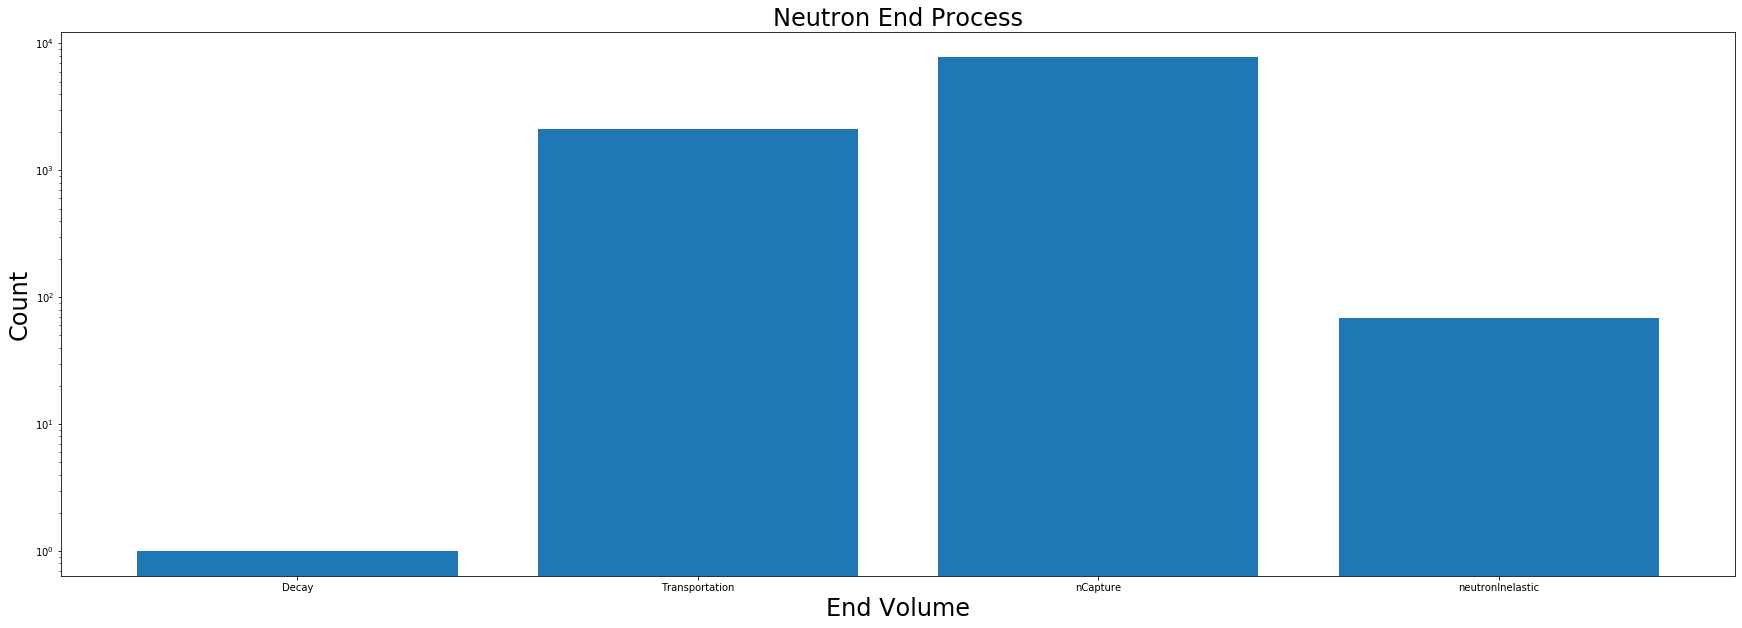

In [11]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('End Volume', size = 24 )
ax.set_title('Neutron End Process', size = 24 ) 
ax.bar(procs, end_process_weights)
ax.set_yscale('log')
plt.show()

## GdLS neutrons

In [12]:
gdls_neutrons = [neutron for neutron in neutron_dictionaries if 'ScintillatorCenter' in neutron['NextVolume']]
died_in_gdls = [neutron for neutron in gdls_neutrons if 'ScintillatorCenter' == neutron['NextVolume'][-1]]

In [13]:
gdls_neutrons_captured = [1 if neutron['ProcName'][-1] == 'nCapture' else 0 for neutron in gdls_neutrons]
died_in_gdls_neutrons_captured = [1 if neutron['ProcName'][-1] == 'nCapture' else 0 for neutron in died_in_gdls]

In [14]:
data = []
data.append(['Enters GdLS', 
             len(gdls_neutrons), len(gdls_neutrons)/len(neutron_dictionaries) *100, len(gdls_neutrons)/len(non_ofw) *100., 
             sum(gdls_neutrons_captured), sum(gdls_neutrons_captured)/len(gdls_neutrons_captured) * 100.,  sum(gdls_neutrons_captured)/len(non_ofw) *100.])
data.append(['Dies in GdLS', 
             len(died_in_gdls), len(died_in_gdls)/len(neutron_dictionaries) *100, len(died_in_gdls)/len(non_ofw) *100.,
             sum(died_in_gdls_neutrons_captured), sum(died_in_gdls_neutrons_captured)/len(died_in_gdls_neutrons_captured) * 100.,  sum(died_in_gdls_neutrons_captured)/len(non_ofw) *100.])
data.append(['Comparison of above', len(died_in_gdls), len(died_in_gdls)/len(gdls_neutrons) *100, len(died_in_gdls)/len(gdls_neutrons) *100,
             sum(died_in_gdls_neutrons_captured) / sum(gdls_neutrons_captured) * 100, sum(died_in_gdls_neutrons_captured) / sum(gdls_neutrons_captured) * 100, sum(died_in_gdls_neutrons_captured) / sum(gdls_neutrons_captured) * 100])

print(tabulate.tabulate(data, headers=['','Number', 'Percent', 'Percent exclude OutOfWorld', 'Get captured', 'Get Captured %', '% OofW']))

                       Number    Percent    Percent exclude OutOfWorld    Get captured    Get Captured %    % OofW
-------------------  --------  ---------  ----------------------------  --------------  ----------------  --------
Enters GdLS              2406    24.06                         30.4788        2404               99.9169   30.4535
Dies in GdLS             1875    18.75                         23.7522        1875              100        23.7522
Comparison of above      1875    77.9302                       77.9302          77.995           77.995    77.995


### Kinetic Energy

In [15]:
scint_kinetic = []
for neutron in died_in_gdls:
    first=True
    for i in range(len(neutron['NextVolume'])):
        if neutron['NextVolume'][i] == 'ScintillatorCenter':
            if first:
                scint_kinetic.append(neutron['Kin_MeV'][i])
                first=False
scint_kinetic_last = []
for neutron in died_in_gdls:
    first=True
    for i in range(len(neutron['NextVolume'])):
        if neutron['NextVolume'][i] == 'ScintillatorCenter':
            if first:
                energy = neutron['Kin_MeV'][i]
                first=False
        else:
            first = True
    scint_kinetic_last.append(energy)        

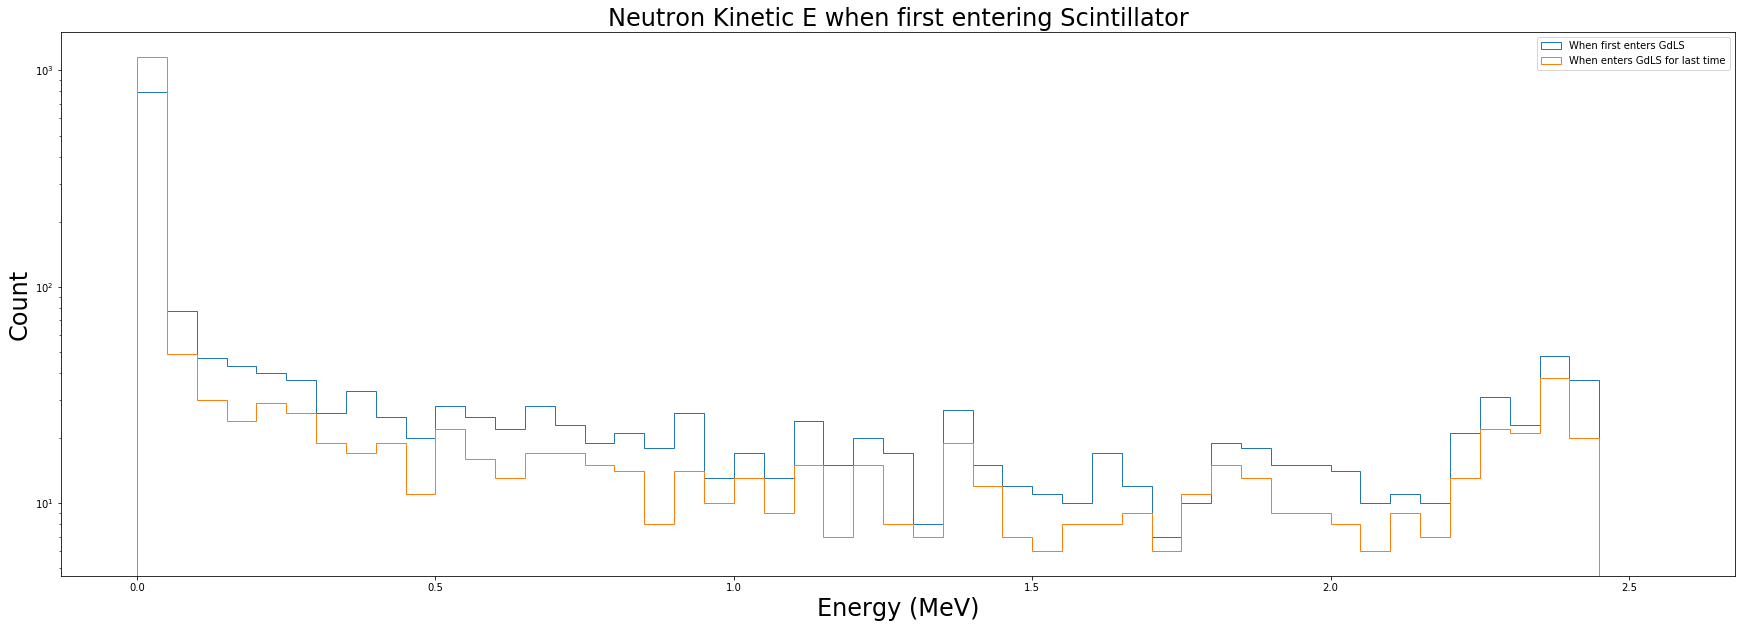

In [16]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
bins=np.arange(0,2.6,0.05)
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('Energy (MeV)', size = 24 )
ax.set_title('Neutron Kinetic E when first entering Scintillator', size = 24 ) 
ax.hist(scint_kinetic, bins=bins, histtype='step', label='When first enters GdLS')
ax.hist(scint_kinetic_last, bins=bins, histtype='step', label='When enters GdLS for last time')
ax.set_yscale('log')
ax.legend()
plt.show()

### Number of Scintillator Interactions

In [17]:
all_scint_ints = []
final_scint_ints = []
all_scint_elastic = []
final_scint_elastics = []
for neutron in died_in_gdls:
    all_counts = 0
    final_counts = 0
    elastics = 0
    final_elastics = 0
    entered_scint = False
    for i in range(len(neutron['NextVolume'])):
        if neutron['NextVolume'][i] == 'ScintillatorCenter':
            proc = neutron['ProcName'][i]
            if proc != 'Transportation' and proc != 'initStep':
                if proc == 'hadElastic':
                    elastics += 1
                    final_elastics += 1
                all_counts += 1
                final_counts += 1
                entered_scint = True
        else:
            if entered_scint:
                final_counts = 0
                final_elastics = 0 
                
    all_scint_ints.append(all_counts)
    final_scint_ints.append(final_counts)
    all_scint_elastic.append(elastics)
    final_scint_elastics.append(final_elastics)

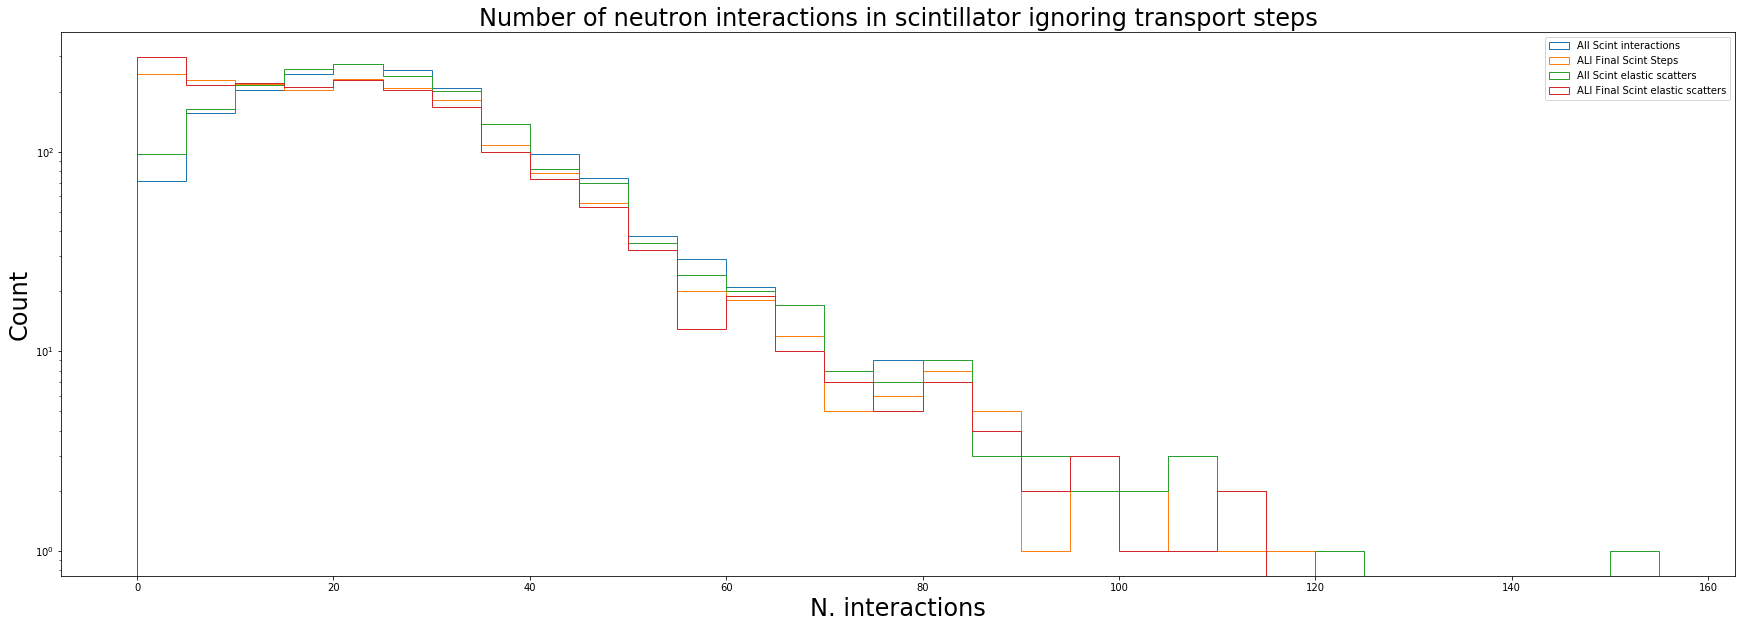

In [18]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
bins=np.arange(0,160,5)
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('N. interactions', size = 24 )
ax.set_title('Number of neutron interactions in scintillator ignoring transport steps', size = 24 ) 
ax.hist(all_scint_ints, bins=bins, histtype='step', label='All Scint interactions')
ax.hist(final_scint_ints, bins=bins, histtype='step', label='ALl Final Scint Steps')
ax.hist(all_scint_elastic, bins=bins, histtype='step', label='All Scint elastic scatters')
ax.hist(final_scint_elastics, bins=bins, histtype='step', label='ALl Final Scint elastic scatters')
ax.set_yscale('log')
ax.legend()
plt.show()

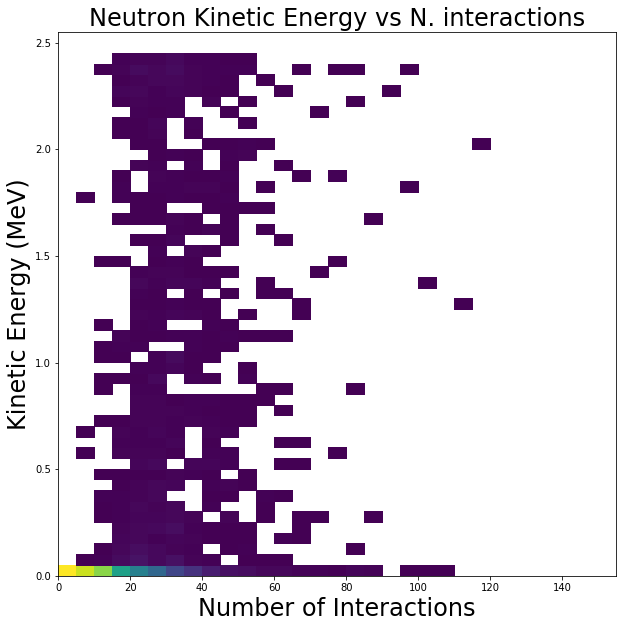

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bins=[np.arange(0,160,5),np.arange(0,2.6,0.05)]
ax.set_ylabel('Kinetic Energy (MeV)', size = 24 )
ax.set_xlabel('Number of Interactions', size = 24 )
ax.set_title('Neutron Kinetic Energy vs N. interactions', size = 24 ) 
ax.hist2d(final_scint_ints, scint_kinetic_last, bins=bins, cmin=1)
plt.show()

In [20]:
weights, bin1, bin2 = np.histogram2d(final_scint_ints, scint_kinetic_last, bins=bins)
f = open('dd_neutrons_gdls_initial_keV_vs_n_interactions.txt', 'w')
# Loop over bin1
for i in range(len(bin1)-1):
    # Loop over bin2
    for j in range(len(bin2)-1):
        f.write(str(bin1[i]) + '\t' + str(bin2[j]) + '\t' + str(weights[i][j]) + '\n')
f.close()

In [21]:
# The differnce of 1 is because the final step is a capture
print('Mean interactions:', np.mean(all_scint_ints))
print('Mean interactions:', np.mean(final_scint_ints))
print('Mean Elastic Scatters:', np.mean(all_scint_elastic))
print('Mean final elastics:', np.mean(final_scint_elastics))

Mean interactions: 26.701866666666668
Mean interactions: 22.493333333333332
Mean Elastic Scatters: 25.701866666666668
Mean final elastics: 21.493333333333332


### Distance Travelled

In [22]:
distances = []
left_and_reentered = 0
for neutron in died_in_gdls:
    this_x = []
    this_y = []
    this_z = []
    leaves_scint = False
    entered_scint = False
    left_and_reentered_bool = False
    for i in range(len(neutron['NextVolume'])):
        if neutron['NextVolume'][i] == 'ScintillatorCenter':
            this_x.append(neutron['x_mm'][i])
            this_y.append(neutron['y_mm'][i])
            this_z.append(neutron['z_mm'][i])
            entered_scint = True
        else:
            if entered_scint:
                left_and_reentered_bool = True
                this_x = []
                this_y = []
                this_z = []
    if left_and_reentered_bool:
        left_and_reentered += 1
    distance = 0.0
    if len(this_x) > 1:
        for i in range(len(this_x) - 1):
            distance += np.sqrt((this_x[i+1] - this_x[i])**2 + (this_y[i+1] - this_y[i])**2 + (this_z[i+1] - this_z[i])**2)
    distances.append(distance)

In [23]:
print('N. neutrons that left and re-entered scintillator (but died in scintillator):', left_and_reentered, 'neutrons or', left_and_reentered / len(distances) * 100, "% which enter the scintillator")

N. neutrons that left and re-entered scintillator (but died in scintillator): 702 neutrons or 37.44 % which enter the scintillator


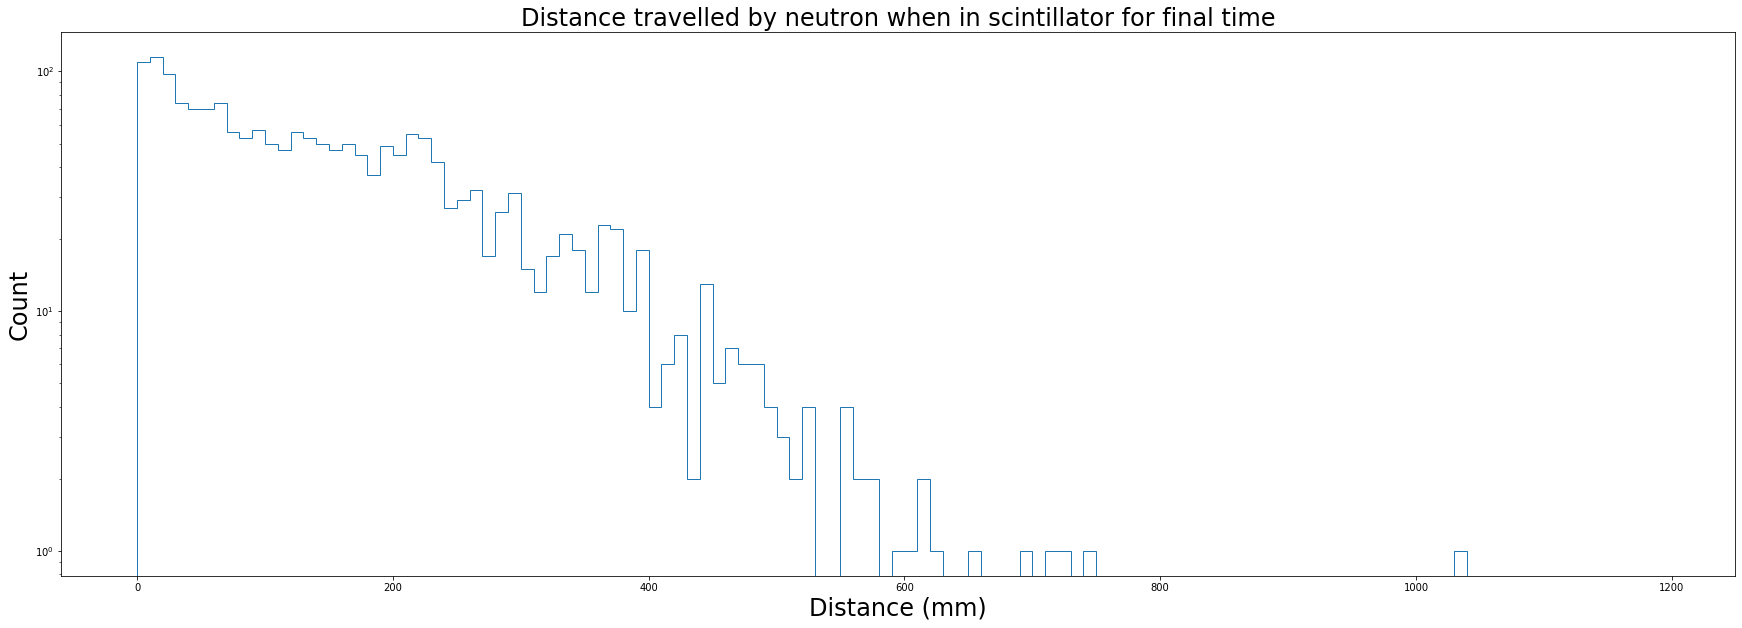

In [24]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
bins=np.arange(0,1200,10)
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('Distance (mm)', size = 24 )
ax.set_title('Distance travelled by neutron when in scintillator for final time', size = 24 ) 
ax.hist(distances, bins=bins, histtype='step')
ax.set_yscale('log')
plt.show()

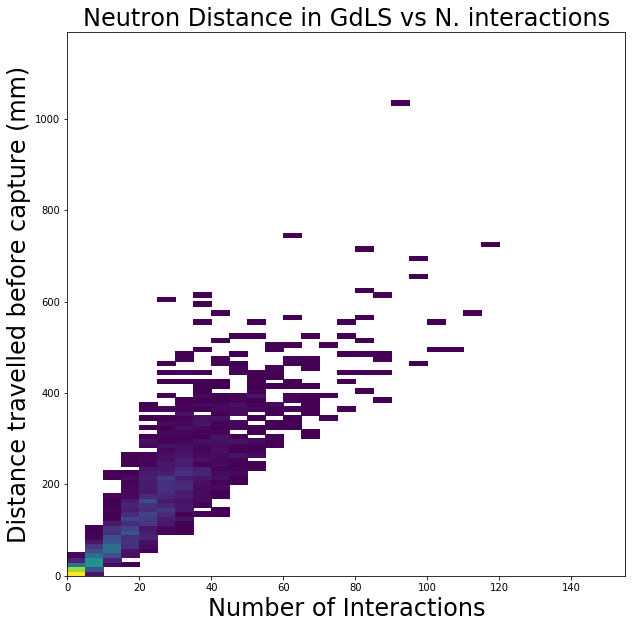

In [25]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bins=[np.arange(0,160,5),np.arange(0,1200,10)]
ax.set_ylabel('Distance travelled before capture (mm)', size = 24 )
ax.set_xlabel('Number of Interactions', size = 24 )
ax.set_title('Neutron Distance in GdLS vs N. interactions', size = 24 ) 
ax.hist2d(final_scint_ints, distances, bins=bins, cmin=1)
plt.show()

In [26]:
weights, bin1, bin2 = np.histogram2d(final_scint_ints, distances, bins=bins)
f = open('dd_neutrons_gdls_distance_travelled_vs_n_interactions.txt', 'w')
# Loop over bin1
for i in range(len(bin1)-1):
    # Loop over bin2
    for j in range(len(bin2)-1):
        f.write(str(bin1[i]) + '\t' + str(bin2[j]) + '\t' + str(weights[i][j]) + '\n')
f.close()

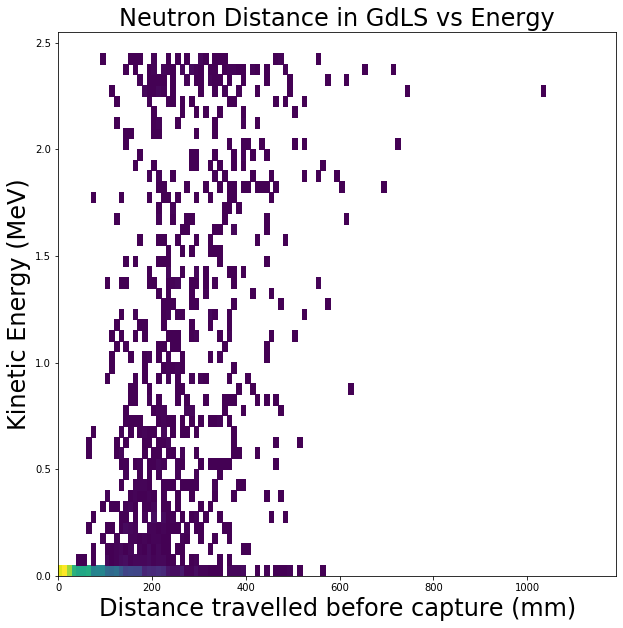

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
bins=[np.arange(0,1200,10),np.arange(0,2.6,0.05)]
ax.set_ylabel('Kinetic Energy (MeV)', size = 24 )
ax.set_xlabel('Distance travelled before capture (mm)', size = 24 )
ax.set_title('Neutron Distance in GdLS vs Energy', size = 24 ) 
ax.hist2d(distances, scint_kinetic_last, bins=bins, cmin=1)
plt.show()

### Kinetic Energy when captured

In [28]:
final_stage_kinetic = []
for neutron in died_in_gdls:
    energy = []
    for i in range(len(neutron['NextVolume'])):
        if neutron['NextVolume'][i] == 'ScintillatorCenter':
                energy.append(neutron['Kin_MeV'][i])
    final_stage_kinetic.append(energy[-2]) 
final_stage_kinetic_ev = np.array(final_stage_kinetic) * 1000 * 1000

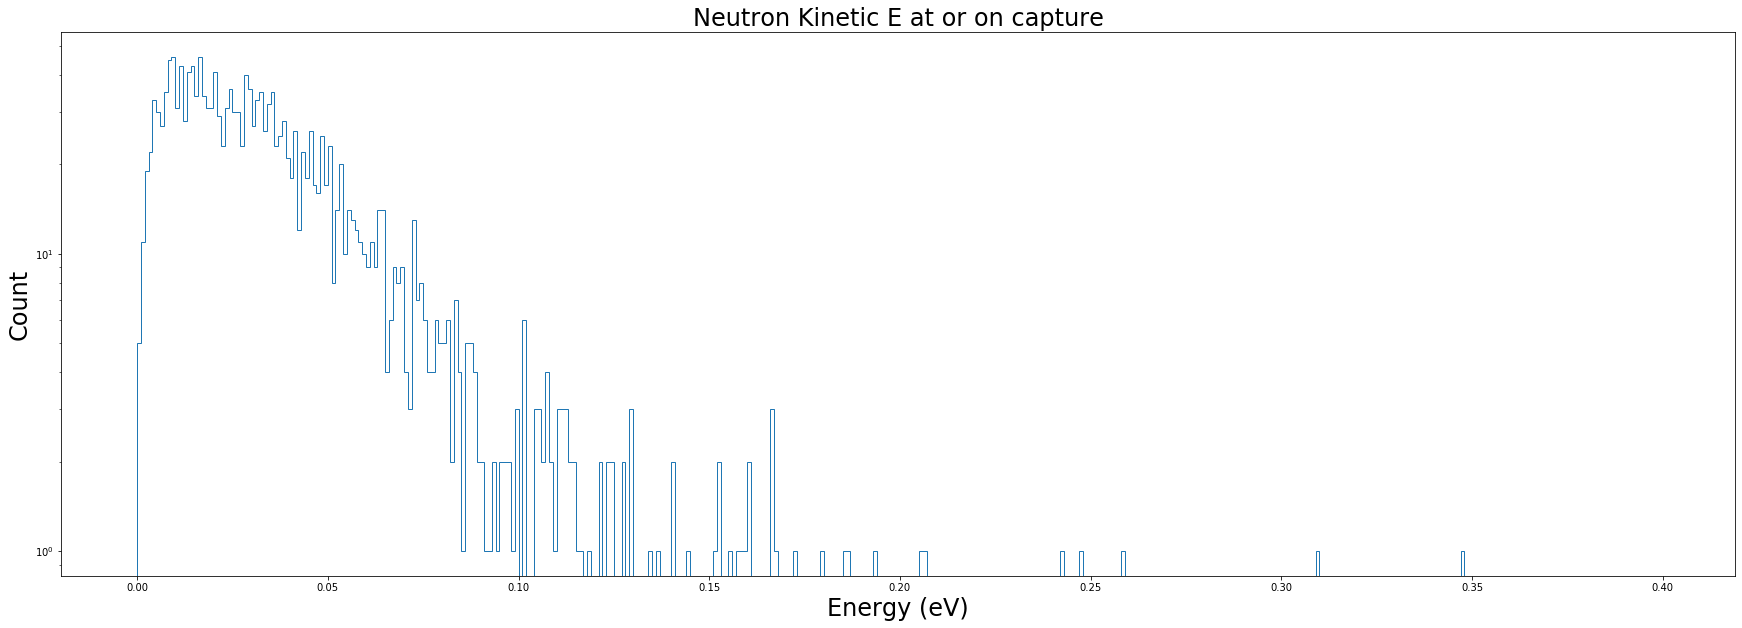

In [29]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
bins=np.arange(0.0,0.4,0.001)
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('Energy (eV)', size = 24 )
ax.set_title('Neutron Kinetic E at or on capture', size = 24 ) 
ax.hist(final_stage_kinetic_ev, bins=bins, histtype='step')
ax.set_yscale('log')
plt.show()

### Energy lost per elastic collision

In [30]:
collision_energy_lost_frac = []
t = 0
procs = []
for neutron in died_in_gdls:
    energy_lost_frac = []
    leaves_scint = False
    entered_scint = False
    a = False
    for i in range(len(neutron['NextVolume'])):
        if neutron['NextVolume'][i] == 'ScintillatorCenter':
            procs.append(neutron['ProcName'][i])
            if neutron['ProcName'][i] == 'hadElastic':
                prev_energy = neutron['dE_MeV'][i] + neutron['Kin_MeV'][i]
                energy_lost_frac.append(neutron['dE_MeV'][i] / prev_energy)
            entered_scint = True
        else:
            if entered_scint:
                a = True
                energy_lost_frac = []
    # Ingore last energy as may have been capture
    collision_energy_lost_frac.extend(energy_lost_frac)

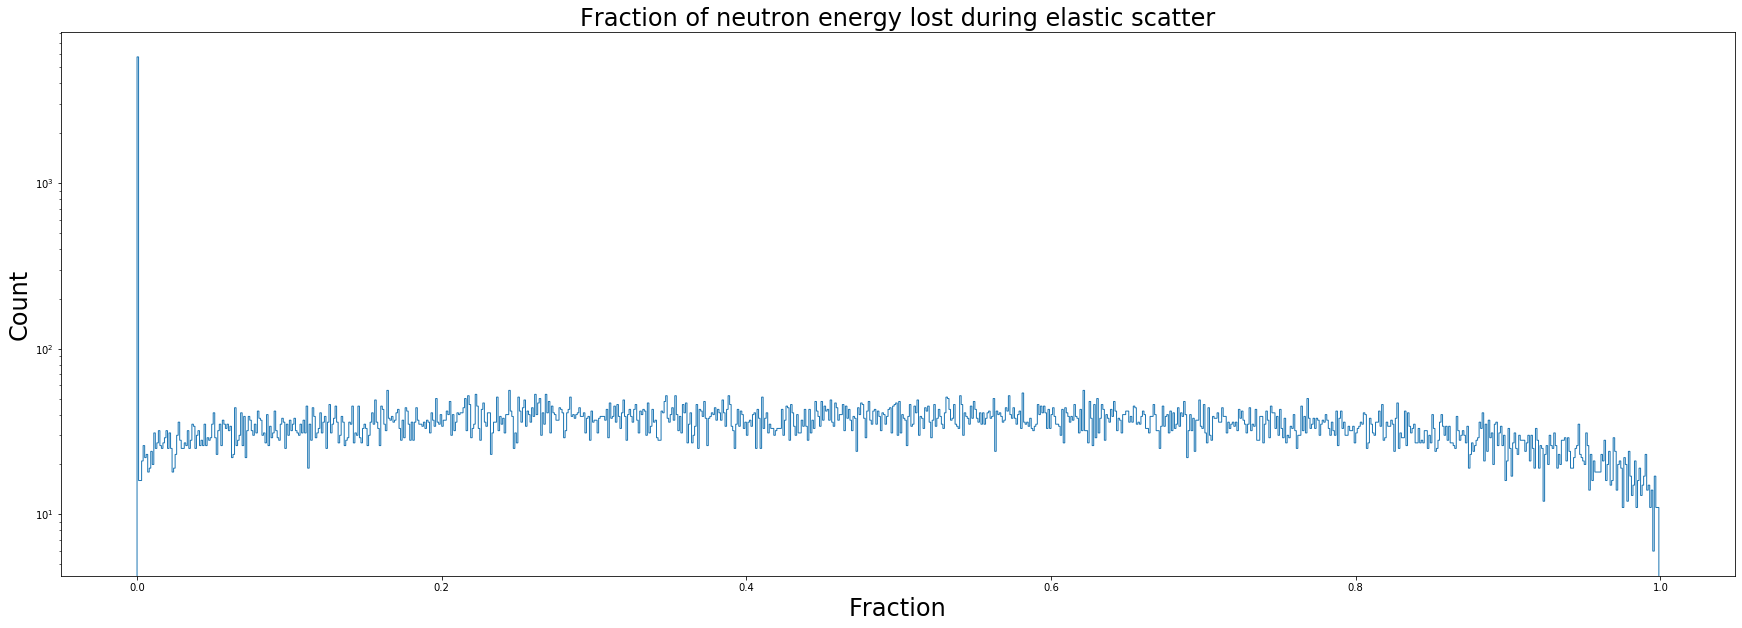

In [31]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
bins=np.arange(0.0,1.0,0.001)
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('Fraction', size = 24 )
ax.set_title('Fraction of neutron energy lost during elastic scatter', size = 24 ) 
ax.hist(collision_energy_lost_frac, bins=bins, histtype='step')
ax.set_yscale('log')
plt.show()

### Neutron Secondaries

In [43]:
secondaries = []
for neutron in died_in_gdls:
    secondaries.append(gdls_physics.baccarat_verbose_reader.get_particle_secondaries(neutron, filter_by_volume=['ScintillatorCenter'], ignore_self=True))

In [44]:
secondaries_flat = [s for sub_s in secondaries for s in sub_s]
unique_secondaries = np.unique(secondaries_flat)
secondaries_weights = []
uni_secondaries = []
for uni in unique_secondaries:
    count = 0
    for j in secondaries_flat:
        if j == uni:
            count += 1
    secondaries_weights.append(count)
    uni_secondaries.append(uni)

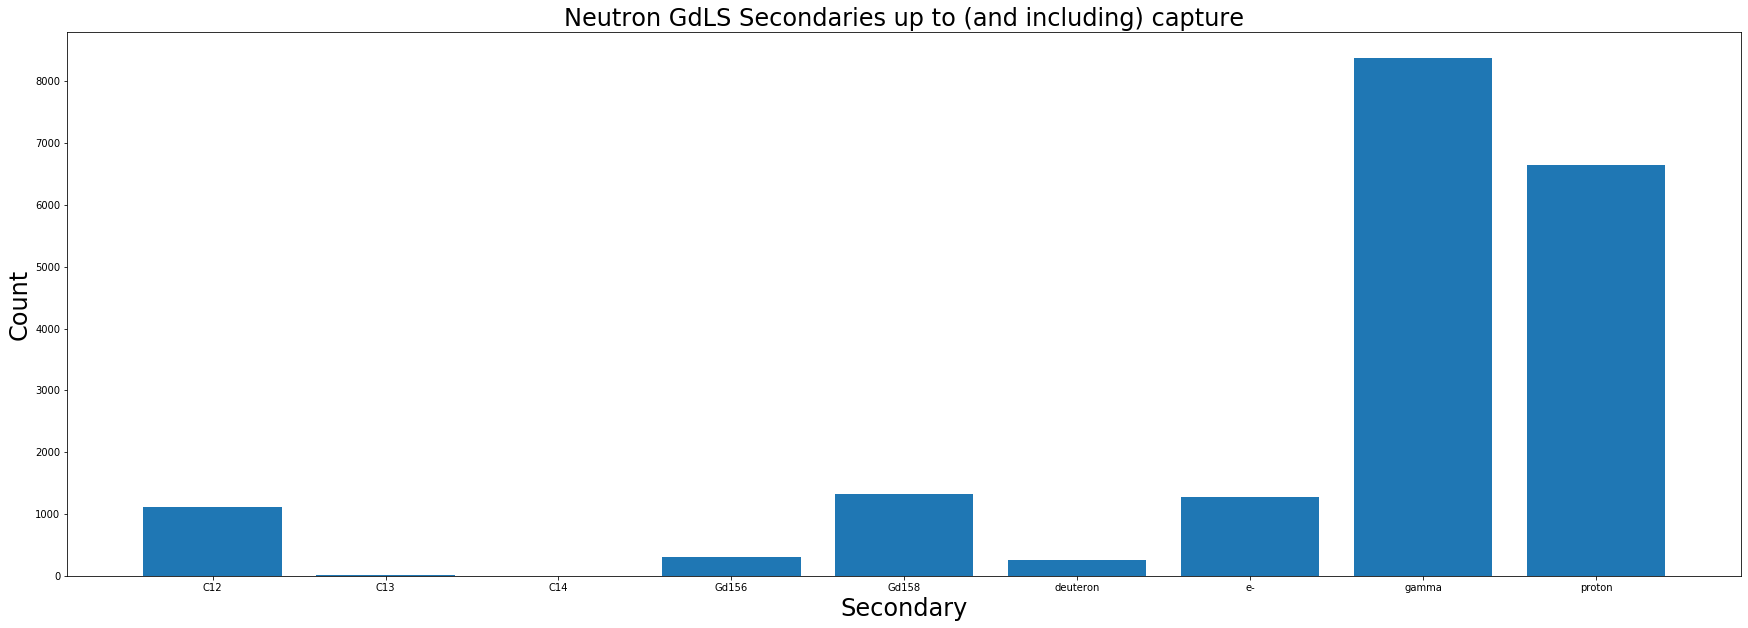

In [46]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
ax.set_ylabel('Count', size = 24 )
ax.set_xlabel('Secondary', size = 24 )
ax.set_title('Neutron GdLS Secondaries up to (and including) capture', size = 24 ) 
ax.bar(uni_secondaries, secondaries_weights)
#ax.set_yscale('log')
plt.show()

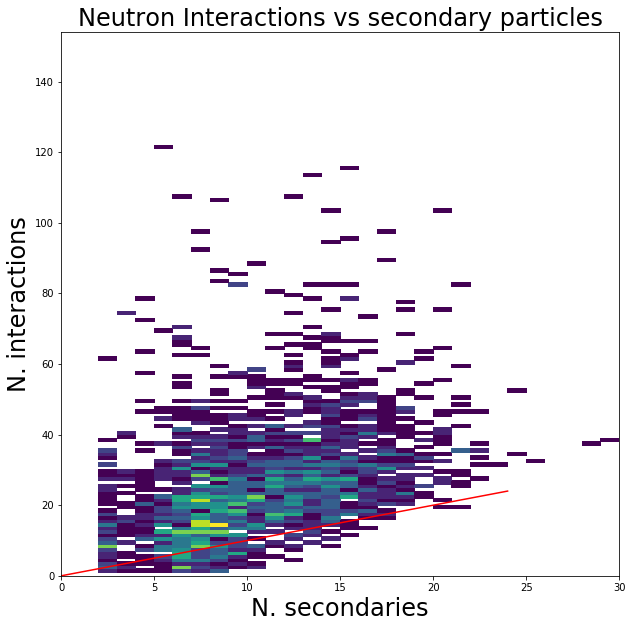

In [52]:
n_secondaries = [len(s) for s in secondaries]

fig, ax = plt.subplots(1,1,figsize=(10,10))
bins=[np.arange(0,max(n_secondaries),1),np.arange(0,max(all_scint_ints),1)]
ax.set_ylabel('N. interactions', size = 24 )
ax.set_xlabel('N. secondaries', size = 24 )
ax.set_title('Neutron Interactions vs secondary particles', size = 24 ) 
ax.hist2d(n_secondaries, all_scint_ints, bins=bins, cmin=1)
ax.plot(range(25),range(25), 'r')
plt.show()

### Neutron capture

In [72]:
def get_seconda(primary_particle_dictionary):

    capture_particle = []
    final_event = []
    
    # Can either be a list or a str depending on if merged or not
    primary_track_id = primary_particle_dictionary['track_id']
    primary_xyz = [primary_particle_dictionary['x_mm'][-1], primary_particle_dictionary['y_mm'][-1], primary_particle_dictionary['z_mm'][-1]]
    
    # Load event dictionaries
    event_list = np.load(primary_particle_dictionary['filename'], allow_pickle=True)


    # Get list[str] of secondaries
    if type(primary_track_id) == list:
        track_id = primary_track_id[-1]
    else:
        track_id = primary_track_id
        
    for particle_dictionary in event_list:
        # Get final 
        if particle_dictionary['track_id'] == track_id:
            final_event.append(particle_dictionary['ProcName'][-1])
        if particle_dictionary['parent_id'] == track_id:
            # check x-y-z
            particle_xyz = [particle_dictionary['x_mm'][0], particle_dictionary['y_mm'][0], particle_dictionary['z_mm'][0]]
            if particle_xyz == primary_xyz:
                # Ignore gamma and electrons and carbon
                particle = particle_dictionary['particle']
                if particle != 'gamma' and particle != 'e-' and particle != 'C13' and particle != 'C14':
                    capture_particle.append(particle_dictionary['particle'])
                
        
    return final_event, capture_particle


In [73]:
end_proc = []
captured_particle = []
for neutron in died_in_gdls:
    a, b = get_seconda(neutron)
    end_proc.append(a)
    captured_particle.append(b)

In [86]:
b

['deuteron']

In [74]:
end_proc_flat = [b for sub_b in end_proc for b in sub_b]
captured_particle_flat = [b for sub_b in captured_particle for b in sub_b]

In [78]:
capture_particle_flat = [b for sub_b in captured_particle for b in sub_b]
unique_captures = np.unique(capture_particle_flat)
capture_weights = []
uni_catpure = []
for uni in unique_captures:
    count = 0
    for j in capture_particle_flat:
        if j == uni:
            count += 1
    capture_weights.append(count)
    uni_catpure.append(uni)

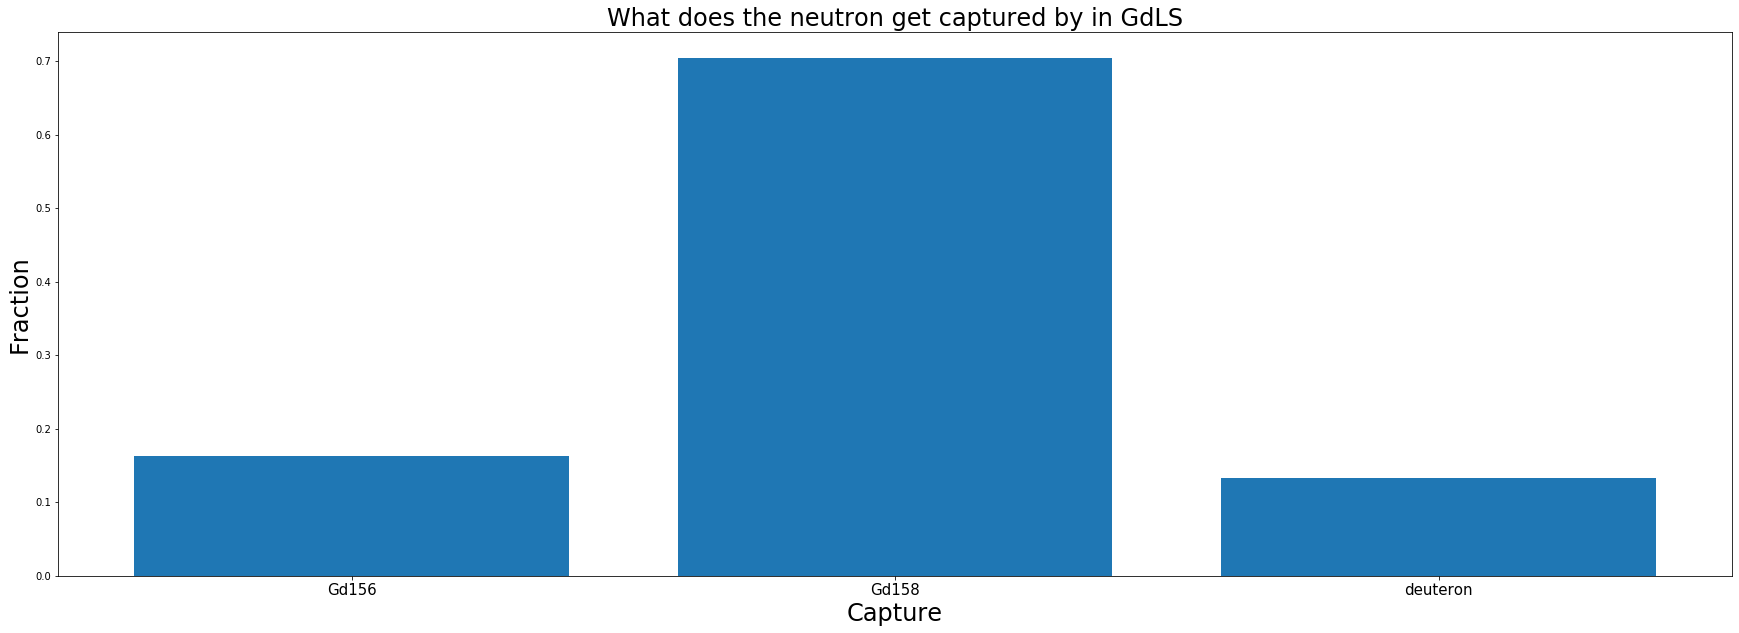

In [84]:
fig, ax = plt.subplots(1,1,figsize=(30,10))
ax.set_ylabel('Fraction', size = 24 )
ax.set_xlabel('Capture', size = 24 )
ax.set_title('What does the neutron get captured by in GdLS', size = 24 ) 
ax.bar(uni_catpure, np.array(capture_weights)/(sum(capture_weights)))
ax.tick_params(axis='x', labelsize=15)
plt.show()